# Лабораторная работа 1
***

### *Упражнение 1.2*

[Ссылка на Binder с примерами](http://mybinder.org/repo/AllenDowney/ThinkDSP)

> Скачайте с сайта http://freesound.org образец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота   постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связаны тембр звука и гармоническая структура, видимая в спектре?

> Используйте ***high_pass***, ***low_pass*** и ***band_stop*** для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигналы и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре

Загрузим звук с сайта

In [51]:
from thinkdsp import read_wave, decorate

wave = read_wave("violin.wav")
wave.make_audio()

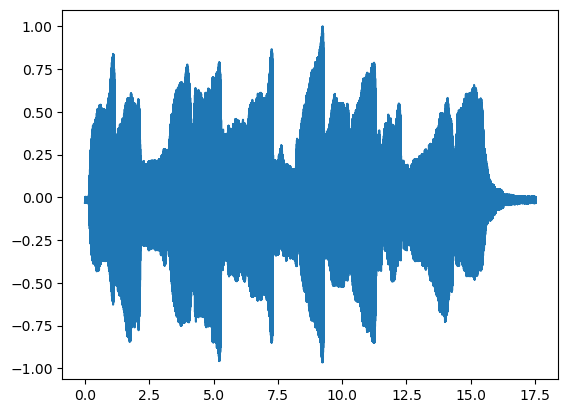

In [55]:
wave.plot()

Выделим сегмент с примерно постоянной высотой

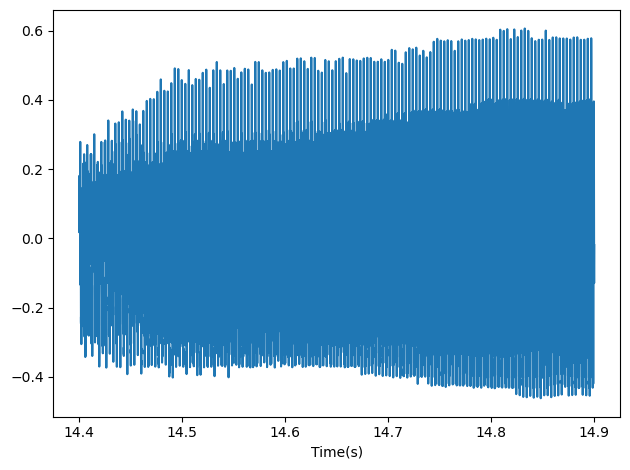

In [76]:
start = 14.4
duration = 0.5
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time(s)')

Рассчитаем спектр сегмента с помощью `make_spectrum` и распечатаем его с помощью метода `plot`

In [90]:
spectrum = segment.make_spectrum()
spectrum

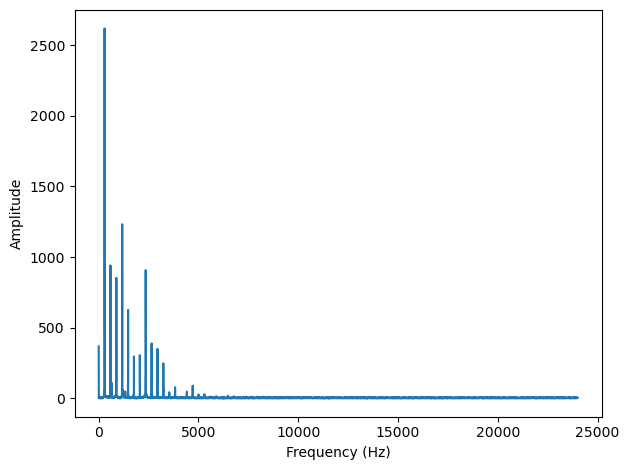

In [91]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Амплитуды частот выше 5 кГц очень малы. Можем поставить ограничение, чтобы лучше видеть низкие частоты 

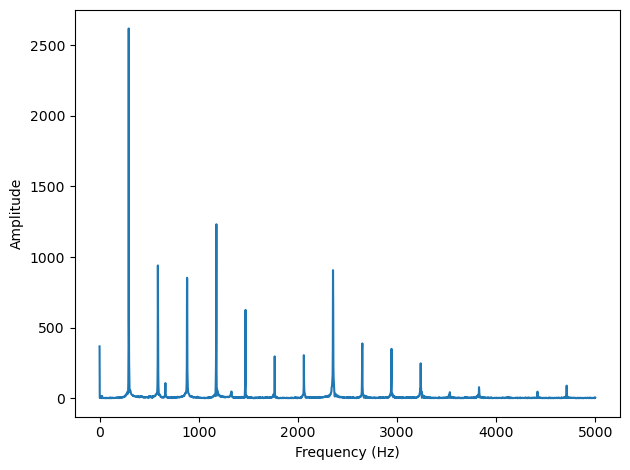

In [103]:
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Вопрос? Откуда какая-то активность на 0 частоте? Помехи? (Пока не учитываем)

Базовая и доминирующая частота около 300 Гц - нота Ре первой октавы (D4). Другие пики:
* ~600 Гц - в 2 раза больше базы, следовательно октава. Ре второй октавы (D5)
* ~900 Гц - Си бемоль(B5). Образует малую сексту с Ре (D5) 
* ~1200 Гц - две октавы от базы.
* ...

In [104]:
segment.make_audio()

Используя `low_pass` оставим только частоты ниже определенной.

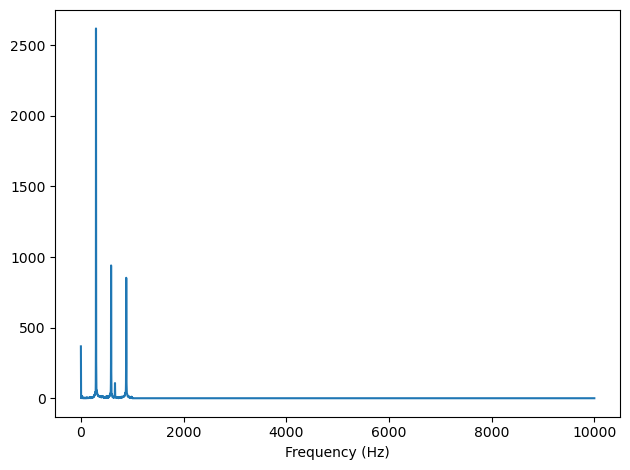

In [109]:
spectrum.low_pass(3000)
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

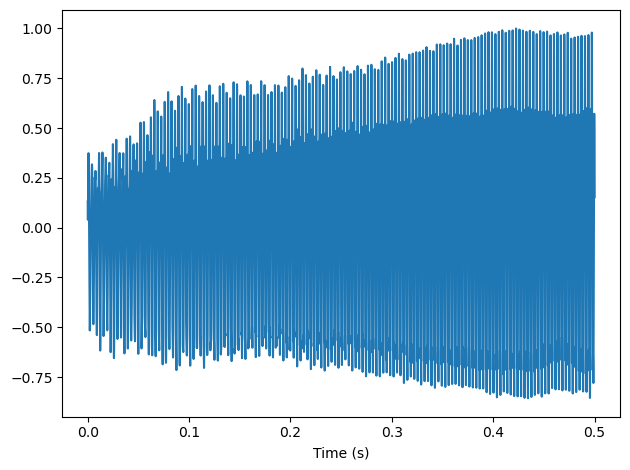

In [110]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.plot()
decorate(xlabel='Time (s)')

Отфильтрованная волна выглядит более разрозненной

In [111]:
filtered.make_audio()

Полученный звук звучит более менее качественно, не так звонко. Как будто из телефона

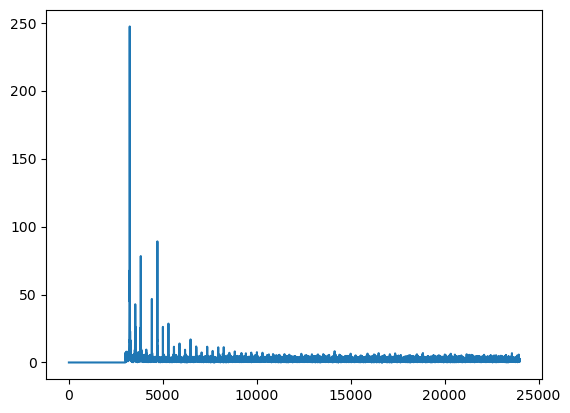

In [114]:
spectrum = segment.make_spectrum()
spectrum.high_pass(3000)
spectrum.plot()

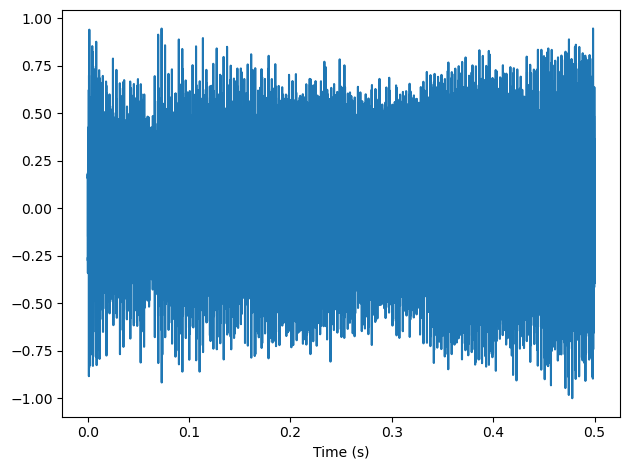

In [115]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.plot()
decorate(xlabel='Time (s)')

In [116]:
filtered.make_audio()

Полученный звук, который не имеет низких частот, звучит как кипящий чайник 

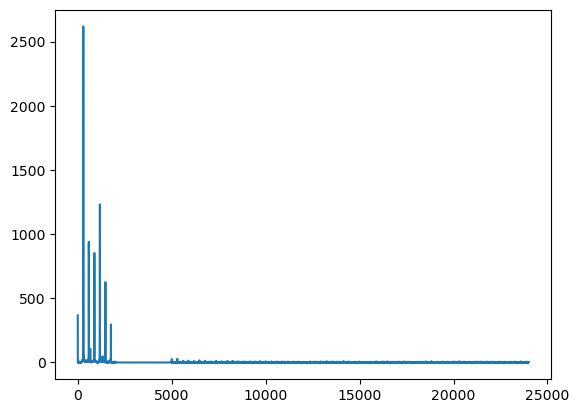

In [123]:
spectrum = segment.make_spectrum()
spectrum.band_stop(2000, 5000)
spectrum.plot()

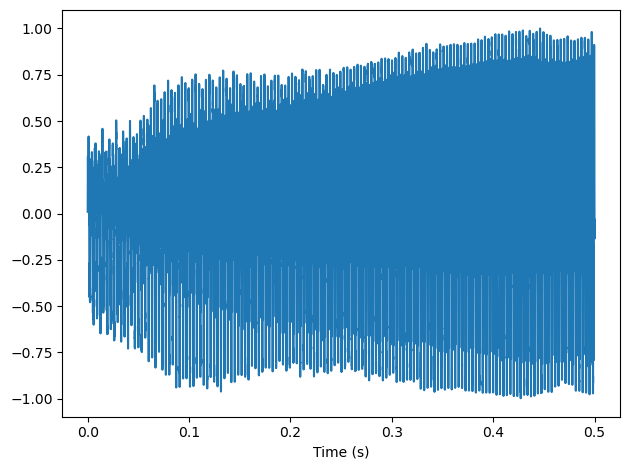

In [124]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.plot()
decorate(xlabel='Time (s)')

In [125]:
filtered.make_audio()

Звук получился более гулким, как будто поместили под ведро

### *Упражнение 1.3*

> Создайте сложный сигнал из объектов SinSignal и CosSignal, суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите spectrum и распечатайте. Что произойдет при добавлении частотных компонент, не кратных основным.

In [22]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=370, amp=1.5, offset=0)

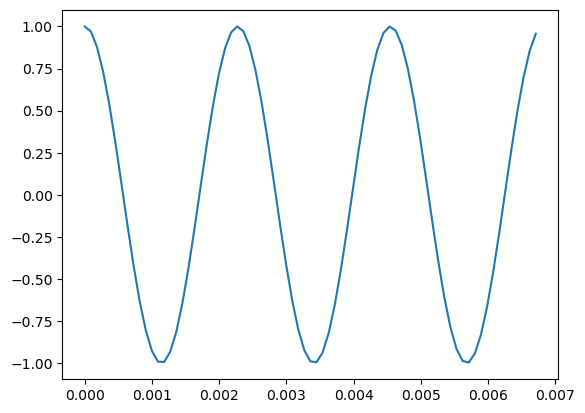

In [2]:
cos_sig.plot()

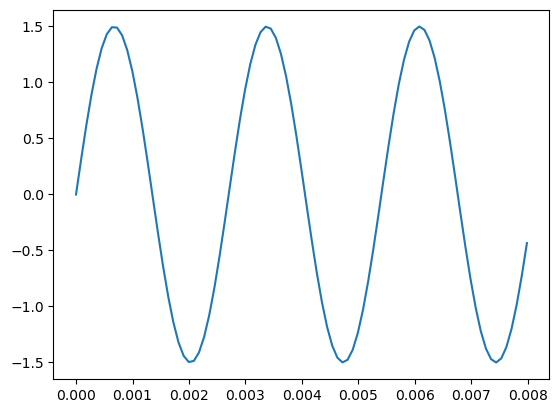

In [23]:
sin_sig.plot()

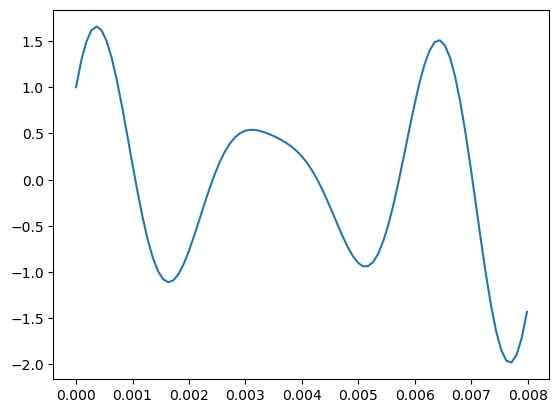

In [24]:
good_mix = sin_sig + cos_sig
good_mix.plot()

In [25]:
good_wave = good_mix.make_wave(duration=2, start=0, framerate=11025)
good_wave.make_audio()

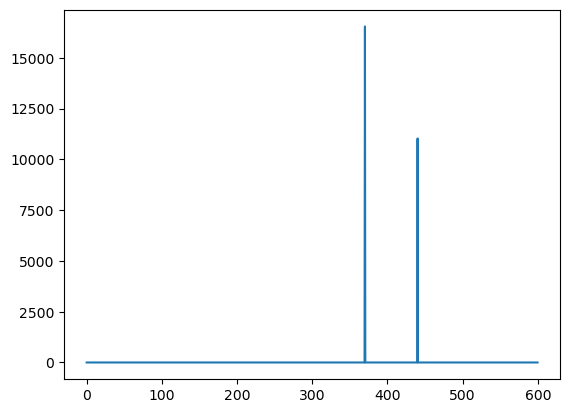

In [28]:
good_spectrum = good_wave.make_spectrum()
good_spectrum.plot(high=600)

На спектре видим четко выраженные пики на частотах, которые мы задали волнам - 370 и 440 Гц. Они гармоничны, соответствуют нотам Фа диез и Ля соответственно

Теперь добавим к сигналу синусоиду, которая не будет кратна основной

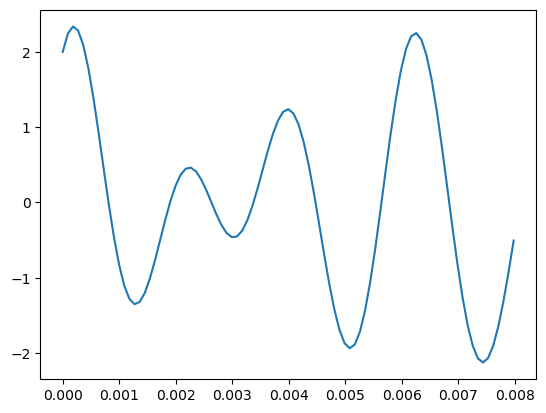

In [38]:
bad_mix = good_mix + CosSignal(freq=493.4, amp=1.0, offset=0)
bad_mix.plot()

In [39]:
bad_wave = bad_mix.make_wave(duration=2, start=0, framerate=11025)
bad_wave.make_audio()

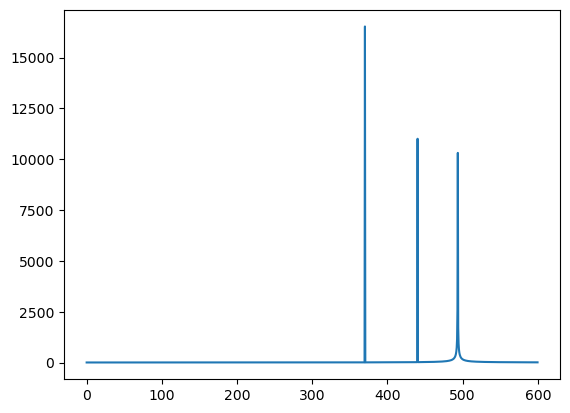

In [40]:
bad_spectrum = bad_wave.make_spectrum()
bad_spectrum.plot(high=600)

Полученный звук звучит не так приятно как предыдущий, так как мы добавили к волне негармоничную волну с частотой 493

### Упражнение 1.4
> Напишите функцию `stretch`, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate